In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imagej
import scyjava
from scipy import stats

In [2]:
cwd = os.getcwd()
pardir = os.path.dirname(os.path.dirname(cwd))
path_data = pardir + "/data/preprocessing_auto"
path_auxiliary = '/Users/beatrizfernandes/Documents/Biomédica@IST/Mestrado/PIC2/auxiliary/'

In [3]:
try: ij
except NameError: ij = imagej.init('sc.fiji:fiji:2.14.0')
ij

21:47:21.780 [SciJava-49d76c8-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:80)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:538)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:139)
	at sun.reflect.NativeConstructorAccessorImpl.newInstan

<java object 'net.imagej.ImageJ'>

# A. Original Histograms of Pixel Intensity

In [4]:
# path_input = path_data + "/layer 0/split channels dapi-gfap/"
path_input = path_data + "/layer 1/normalized/"
i = 0

images = np.sort(list(filter(lambda element: '.tif' in element, os.listdir(path_input))))
hists = pd.DataFrame(index=np.arange(0,256))
means = pd.DataFrame(index=np.arange(0,85))

for im, image_name in enumerate(images):
    java_image = ij.io().open(path_input + image_name)
    py_image = ij.py.from_java(java_image)
    print(image_name)
    unique, counts = np.unique(py_image, return_counts=True)
    
    hists[image_name.split('.')[0]] = np.zeros((256,1))
    hists[image_name.split('.')[0]].loc[unique] = counts

    means[image_name.split('.')[0]] = np.zeros((85,1))
    means[image_name.split('.')[0]][:py_image.shape[0]] = np.array(py_image.mean(axis = (1,2)))
    means[image_name.split('.')[0]][py_image.shape[0]:] = np.NaN

21:47:27.648 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is x86_64
21:47:27.651 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
21:47:27.651 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
21:47:27.652 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/osx_64/
21:47:27.652 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
21:47:27.653 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/osx_64/libturbojpeg.dylib
21:47:27.653 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is osx_64/
21:47:27.653 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
21:47:27.654 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find r

[java.lang.Enum.toString] 21:47:27.648 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is x86_64
[java.lang.Enum.toString] 21:47:27.651 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
[java.lang.Enum.toString] 21:47:27.651 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
[java.lang.Enum.toString] 21:47:27.652 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/osx_64/
[java.lang.Enum.toString] 21:47:27.652 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
[java.lang.Enum.toString] 21:47:27.653 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/osx_64/libturbojpeg.dylib
[java.lang.Enum.toString] 21:47:27.653 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is osx_64/
[java.lang.

21:47:27.890 [AWT-AppKit] DEBUG loci.common.NIOByteBufferProvider - Using mapped byte buffer? false
21:47:27.999 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOSe

[java.lang.Enum.toString] 21:47:27.890 [AWT-AppKit] DEBUG loci.common.NIOByteBufferProvider - Using mapped byte buffer? false
[java.lang.Enum.toString] 21:47:27.999 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsO

image_001_dapi_normalized.tif
21:47:32.776 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:32.776 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_001_gfap_normalized.tif
21:47:36.635 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:36.635 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_002_dapi_normalized.tif
21:47:40.372 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:40.372 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_002_gfap_normalized.tif
21:47:43.717 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:43.717 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_003_dapi_normalized.tif
21:47:46.985 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:46.985 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_003_gfap_normalized.tif
21:47:50.314 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:50.314 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_004_dapi_normalized.tif
21:47:53.762 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:47:53.762 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_004_gfap_normalized.tif


[java.lang.Enum.toString] 21:47:57.478 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

21:47:57.478 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:87

[java.lang.Enum.toString] 21:48:01.867 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_005_gfap_normalized.tif
21:48:06.086 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:06.086 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_006_dapi_normalized.tif
21:48:09.543 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:09.543 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_006_gfap_normalized.tif
21:48:12.805 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:12.805 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_007_dapi_normalized.tif
21:48:15.939 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:15.939 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_007_gfap_normalized.tif
21:48:19.079 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:19.079 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_008_dapi_normalized.tif
21:48:21.080 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:21.080 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_008_gfap_normalized.tif
21:48:23.155 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:23.155 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_009_dapi_normalized.tif
21:48:26.355 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:26.355 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_009_gfap_normalized.tif
21:48:29.552 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:29.552 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_010_dapi_normalized.tif
21:48:32.828 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:32.828 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_010_gfap_normalized.tif
21:48:36.280 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:36.280 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_011_dapi_normalized.tif
21:48:39.339 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:39.339 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_011_gfap_normalized.tif
21:48:42.974 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:42.974 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_012_dapi_normalized.tif
21:48:45.063 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:45.063 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_012_gfap_normalized.tif
21:48:47.047 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:47.047 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_013_dapi_normalized.tif
21:48:50.786 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:50.786 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_013_gfap_normalized.tif
21:48:54.679 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:54.679 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_014_dapi_normalized.tif
21:48:57.354 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:48:57.354 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_014_gfap_normalized.tif
21:49:00.314 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:00.314 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_015_dapi_normalized.tif
21:49:03.602 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:03.602 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_015_gfap_normalized.tif
21:49:07.047 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:07.047 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_016_dapi_normalized.tif
21:49:10.237 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:10.237 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_016_gfap_normalized.tif
21:49:13.735 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:13.735 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_017_dapi_normalized.tif
21:49:17.051 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:17.051 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_017_gfap_normalized.tif
21:49:20.481 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:20.481 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_018_dapi_normalized.tif
21:49:23.459 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:23.459 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_018_gfap_normalized.tif
21:49:26.502 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:26.502 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_019_dapi_normalized.tif
21:49:30.862 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:30.862 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_019_gfap_normalized.tif
21:49:35.278 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:35.278 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_020_dapi_normalized.tif
21:49:38.365 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:38.365 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_020_gfap_normalized.tif
21:49:41.879 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService

[java.lang.Enum.toString] 21:49:41.879 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

image_021_dapi_normalized.tif


[java.lang.Enum.toString] 21:49:45.477 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

21:49:45.477 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:87

In [5]:
names = []
for img in images:
    names.append(img.split('.')[0])

dapi_names = list(filter(lambda element: 'dapi' in element, names))
gfap_names = list(filter(lambda element: 'gfap' in element, names))

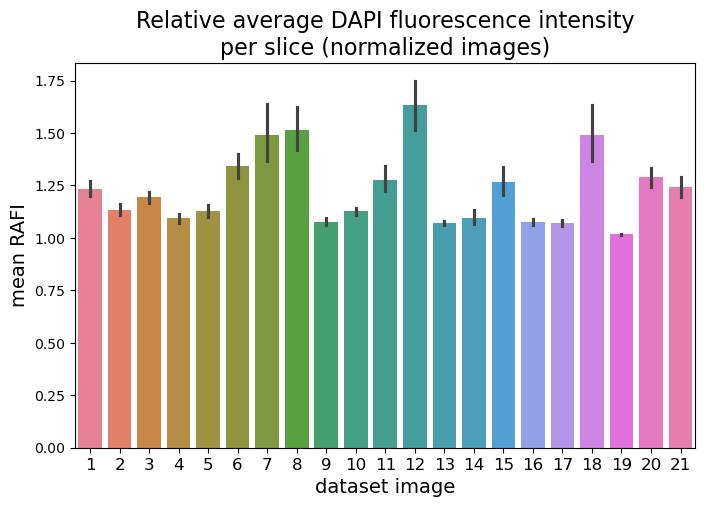

In [6]:
mean_dapi = means.loc[5:59, dapi_names]/means.loc[5:59, dapi_names].min()
pd.DataFrame(np.array((mean_dapi.mean(axis=0),mean_dapi.var(axis=0))).T, columns=['mean', 'var'], index=dapi_names)
# sns.boxplot(means.loc[5:59, dapi_names]/means.loc[5:59, dapi_names].min())
# plt.xticks(ticks = np.arange(22), labels=list(np.arange(1,23)))
# plt.show()
plt.figure(figsize=(8,5))
sns.barplot(means.loc[5:59, dapi_names]/means.loc[5:59, dapi_names].min())
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)), fontsize=12)
plt.ylabel("mean RAFI", fontsize=14)
plt.xlabel("dataset image", fontsize=14)
plt.title("Relative average DAPI fluorescence intensity\nper slice (normalized images)", fontsize=16)
plt.savefig(path_auxiliary + "relative intensity dapi.png", dpi =600)
plt.show()


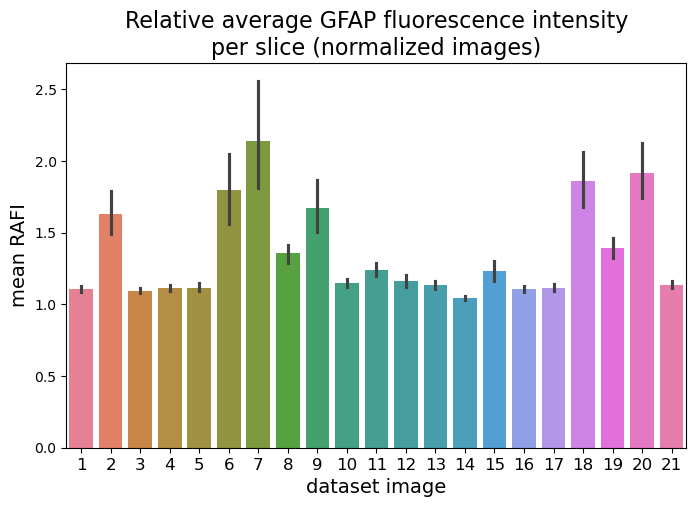

In [7]:
mean_gfap = means.loc[5:59, gfap_names]/means.loc[5:59, gfap_names].min()
pd.DataFrame(np.array((mean_dapi.mean(axis=0),mean_dapi.var(axis=0))).T, columns=['mean', 'var'], index=gfap_names)
# sns.boxplot(means.loc[5:59, gfap_names]/means.loc[5:59, gfap_names].min())
# plt.xticks(ticks = np.arange(22), labels=list(np.arange(1,23)))
# plt.show()
plt.figure(figsize=(8,5))
sns.barplot(means.loc[5:59, gfap_names]/means.loc[5:59, gfap_names].min())
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)), fontsize=12)
plt.ylabel("mean RAFI", fontsize=14)
plt.xlabel("dataset image", fontsize=14)
plt.title("Relative average GFAP fluorescence intensity\nper slice (normalized images)", fontsize=16)
plt.savefig(path_auxiliary + "relative intensity gfap.png", dpi =600)
plt.show()

In [8]:
mean_dapi[mean_dapi.columns[mean_dapi.columns != 'image_008_dapi_normalized']].mean().mean(), mean_dapi[mean_dapi.columns[mean_dapi.columns != 'image_008_dapi_normalized']].var().mean()

(1.2170921771264964, 0.04868262596619781)

In [9]:
mean_gfap[mean_gfap.columns[mean_gfap.columns != 'image_008_gfap_normalized']].mean().mean(), mean_gfap[mean_gfap.columns[mean_gfap.columns != 'image_008_gfap_normalized']].var().mean()

(1.3585278995457384, 0.26880820090830404)

In [10]:
hists.iloc[:,[2,3]]

,image_002_dapi_normalized,image_002_gfap_normalized
0,66250446.0,64239121.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
251,0.0,8.0
252,0.0,19.0
253,0.0,32.0
254,0.0,25.0


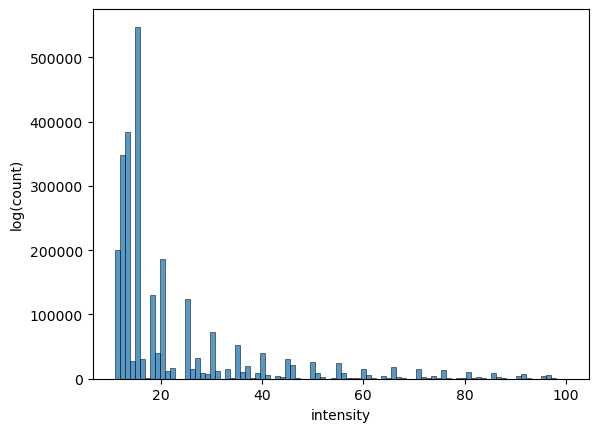

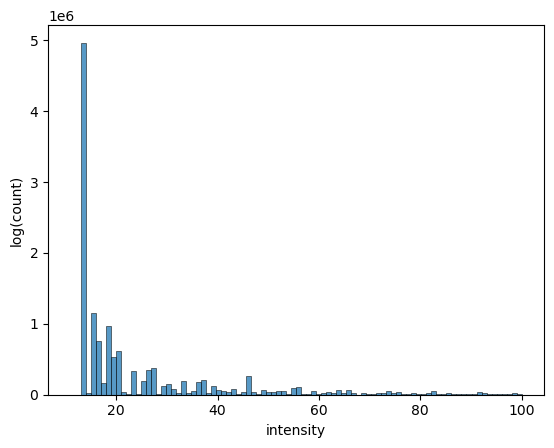

In [11]:
sns.histplot(x= hists.index[11:101], weights =hists.loc[11:100, dapi_names].sum(axis=1), bins = 90)
plt.ylabel("log(count)")
plt.xlabel("intensity")
plt.show()
sns.histplot(x= hists.index[11:101], weights =hists.loc[11:100, gfap_names].sum(axis=1), bins = 90)
plt.ylabel("log(count)")
plt.xlabel("intensity")
plt.show()

## B. Histograms of Pixel Intensity

In [12]:
intensity_dapi = hists.loc[:, dapi_names]
intensity_gfap = hists.loc[:, gfap_names]

In [13]:
intensity_dapi

,image_001_dapi_normalized,image_002_dapi_normalized,image_003_dapi_normalized,image_004_dapi_normalized,image_005_dapi_normalized,image_006_dapi_normalized,image_007_dapi_normalized,image_008_dapi_normalized,image_009_dapi_normalized,image_010_dapi_normalized,...,image_012_dapi_normalized,image_013_dapi_normalized,image_014_dapi_normalized,image_015_dapi_normalized,image_016_dapi_normalized,image_017_dapi_normalized,image_018_dapi_normalized,image_019_dapi_normalized,image_020_dapi_normalized,image_021_dapi_normalized
0,62423517.0,66250446.0,60144647.0,59081383.0,58829665.0,66328271.0,66734105.0,40382187.0,65864794.0,59266021.0,...,38067921.0,60618268.0,44207429.0,56324402.0,60257180.0,57168840.0,66683071.0,84222351.0,66753044.0,56072499.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,69.0,0.0,29.0,22.0,29.0,1.0,4.0,0.0,0.0,26.0,...,13.0,0.0,1.0,76.0,0.0,10.0,6.0,0.0,0.0,60.0
252,89.0,0.0,34.0,24.0,32.0,6.0,7.0,0.0,1.0,36.0,...,15.0,0.0,1.0,80.0,1.0,12.0,13.0,0.0,0.0,51.0
253,33.0,0.0,14.0,8.0,8.0,11.0,11.0,0.0,0.0,8.0,...,4.0,0.0,0.0,22.0,0.0,2.0,19.0,0.0,1.0,14.0
254,36.0,0.0,19.0,11.0,14.0,12.0,8.0,0.0,2.0,11.0,...,2.0,0.0,0.0,23.0,0.0,1.0,14.0,0.0,1.0,20.0


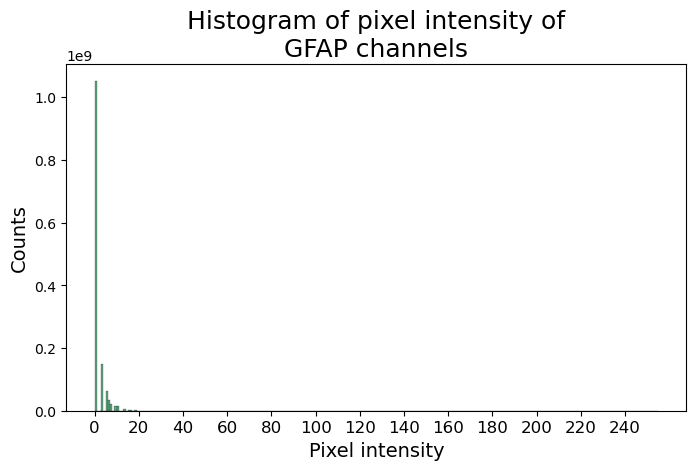

In [14]:
plt.figure(figsize=(8,4.5))
sns.histplot(x = intensity_gfap[:256].sum(axis = 1).index, weights=intensity_gfap[:256].sum(axis=1), bins=255, color='seagreen')
# dapi = intensity['dapi sum'][15:100+1]
# plt.hist(x, weights= dapi, bins = 100-15-1, color='crimson')
plt.xticks(np.arange(0, 255, 20), fontsize=12)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Pixel intensity', fontsize=14)
plt.title('Histogram of pixel intensity of\nGFAP channels', fontsize=18)
plt.savefig(path_auxiliary + 'Gfap histogram.png', dpi = 600)
plt.show()

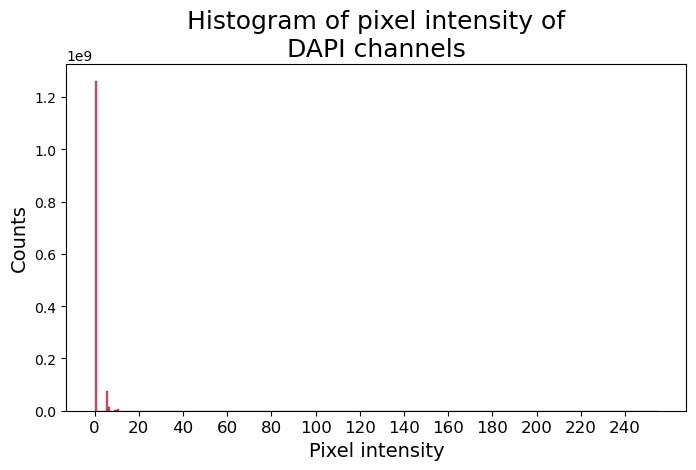

In [15]:
plt.figure(figsize=(8,4.5))
sns.histplot(x = intensity_dapi[:256].sum(axis = 1).index, weights=intensity_dapi[:256].sum(axis = 1), bins=255, color='crimson')
# dapi = intensity['dapi sum'][15:100+1]
# plt.hist(x, weights= dapi, bins = 100-15-1, color='crimson')
plt.xticks(np.arange(0, 255, 20), fontsize=12)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Pixel intensity', fontsize=14)
plt.title('Histogram of pixel intensity of\nDAPI channels', fontsize=18)
plt.savefig(path_auxiliary + 'Dapi histogram.png', dpi = 600)
plt.show()

/Users/beatrizfernandes/anaconda3/envs/imagej/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


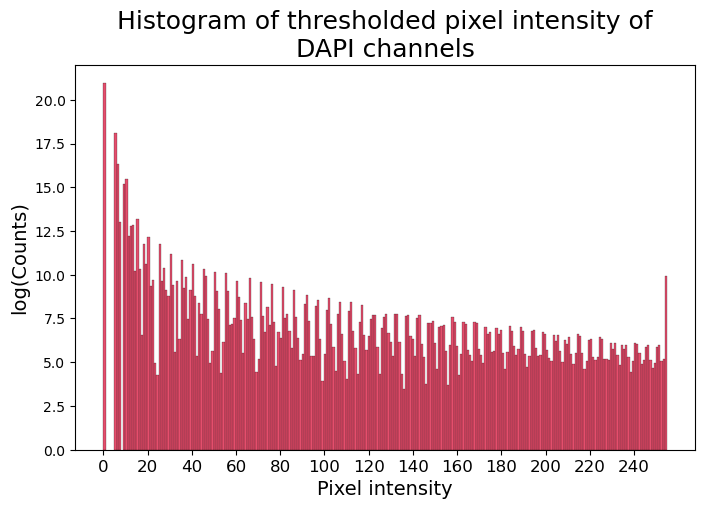

In [16]:
plt.figure(figsize=(8,5))
x = intensity_dapi.index[5:100+1]
min = 0
max = 255
sns.histplot(x = intensity_dapi[min:max+1].sum(axis=1).index, weights=np.log(intensity_dapi[min:max+1].sum(axis=1)), bins=max-min+1, color='crimson')
# dapi = intensity['dapi sum'][15:100+1]
# plt.hist(x, weights= dapi, bins = 100-15-1, color='crimson')
plt.xticks(np.arange(min, max+1, 20), fontsize=12)
plt.ylabel('log(Counts)', fontsize=14)
plt.xlabel('Pixel intensity', fontsize=14)
plt.title('Histogram of thresholded pixel intensity of\nDAPI channels', fontsize=18)
plt.savefig(path_auxiliary + 'Dapi histogram cut.png', dpi = 600)
plt.show()

/Users/beatrizfernandes/anaconda3/envs/imagej/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


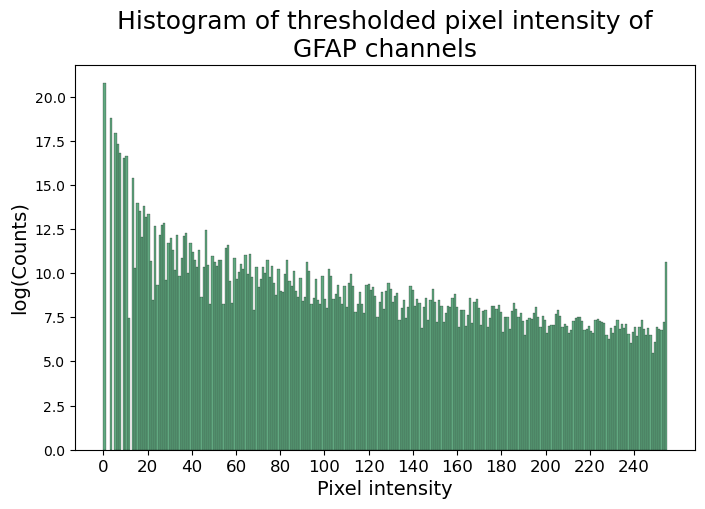

In [17]:
plt.figure(figsize=(8,5))
x = intensity_gfap.index[8:100+1]
min = 0
max = 255
sns.histplot(x = intensity_gfap[min:max+1].sum(axis=1).index, weights=np.log(intensity_gfap[min:max+1].sum(axis=1)), bins=max-min+1, color='seagreen')
# plt.hist(x, weights= dapi, bins = 100-15-1, color='crimson')
plt.xticks(np.arange(min, max+1, 20), fontsize=12)
plt.ylabel('log(Counts)', fontsize=14)
plt.xlabel('Pixel intensity', fontsize=14)
plt.title('Histogram of thresholded pixel intensity of\nGFAP channels', fontsize=18)
plt.savefig(path_auxiliary + 'Gfap histogram cut.png', dpi = 600)
plt.show()

## C. Nuclei Statistics

In [5]:
nuclei = pd.read_csv(path_auxiliary + 'nuclei measurements.csv', delimiter=';')
info = pd.read_csv(path_auxiliary + 'images info.csv', delimiter=';')

In [6]:
nuclei

,image_001,area_001,mean_001,min_001,max_001,image_002,area_002,mean_002,min_002,max_002,...,image_020,area_020,mean_020,min_020,max_020,image_021,area_021,mean_021,min_021,max_021
0,1.0,222.0,5.342,2.0,9.0,1.0,283.0,7.622,1.0,17.0,...,1.0,501.0,5.088,1.0,20.0,1.0,247.0,169.704,24.0,255.0
1,2.0,338.0,4.432,2.0,8.0,2.0,211.0,4.251,1.0,14.0,...,2.0,445.0,5.962,1.0,23.0,2.0,435.0,56.800,14.0,111.0
2,3.0,171.0,180.813,29.0,255.0,3.0,203.0,7.665,1.0,15.0,...,3.0,449.0,9.174,1.0,31.0,3.0,248.0,161.315,11.0,255.0
3,4.0,146.0,189.918,64.0,254.0,4.0,187.0,5.508,1.0,12.0,...,4.0,296.0,23.662,6.0,79.0,4.0,288.0,108.708,15.0,223.0
4,5.0,199.0,198.256,55.0,255.0,5.0,228.0,12.456,2.0,35.0,...,5.0,270.0,29.100,2.0,89.0,5.0,332.0,193.970,27.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pixel_to_micron = info['resolution']/info['x']   #micron/pixel

In [8]:
nuclei_columns = list(nuclei.columns)
nuclei_count = list(filter(lambda element: 'image' in element, nuclei_columns))
nuclei_area = list(filter(lambda element: 'area' in element, nuclei_columns))
nuclei_mean = list(filter(lambda element: 'mean' in element, nuclei_columns))
nuclei_max = list(filter(lambda element: 'max' in element, nuclei_columns))
nuclei_min = list(filter(lambda element: 'min' in element, nuclei_columns))

### 1. Nuclei count

In [9]:
counts = nuclei[nuclei_count].max()

In [10]:
counts.sum()

2034.0

In [24]:
print('mean: ' + str(counts.mean()))
print('median: ' + str(counts.median()))
print('max: ' + str(counts.max()))
print('min: ' + str(counts.min()))
print('std: ' + str(counts.std()))

mean: 96.85714285714286
median: 84.0
max: 194.0
min: 51.0
std: 42.12040564178569


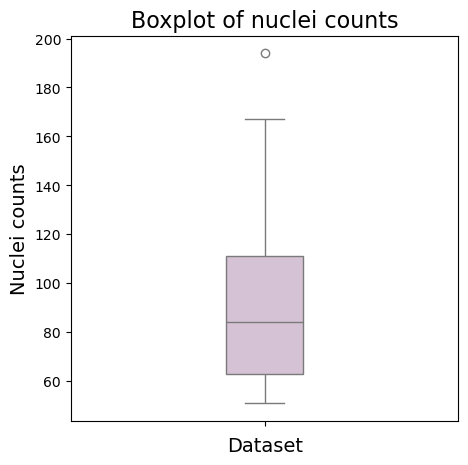

In [25]:
plt.figure(figsize=(5, 5))
sns.boxplot(counts, width=0.2, color='thistle')
plt.ylabel('Nuclei counts',fontsize=14)
plt.xlabel('Dataset',fontsize=14)
plt.title('Boxplot of nuclei counts', fontsize=16)
plt.savefig(path_auxiliary + 'nuclei count.png', dpi = 600)
plt.show()

### 2. Area

In [15]:
nuclei_micron = nuclei[nuclei_area]*np.array(pixel_to_micron).T**2

In [16]:
print('mean: ' + str(nuclei_micron.mean().mean()))
print('median: ' + str(nuclei_micron.median().mean()))
print('max: ' + str(nuclei_micron.max().mean()))
print('min: ' + str(nuclei_micron.min().mean()))
print('std: ' + str(nuclei_micron.std().mean()))

mean: 69.04909420192642
median: 63.65758543170066
max: 181.7582521788188
min: 24.799163577029816
std: 28.031369892399983


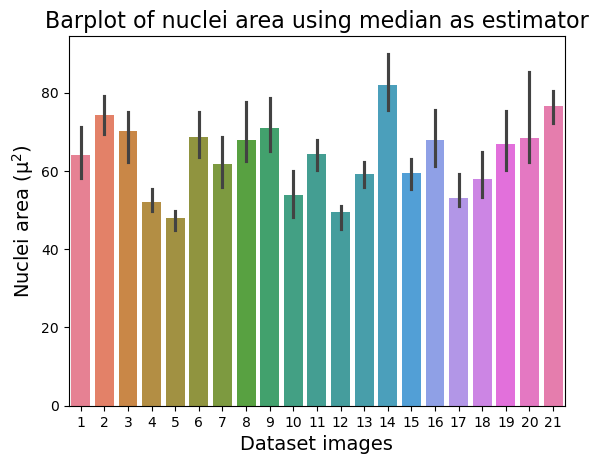

In [17]:
sns.barplot(nuclei_micron, estimator='median')
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)))
plt.xlabel('Dataset images', fontsize=14)
plt.ylabel('Nuclei area (μ$^2$)', fontsize=14)
plt.title('Barplot of nuclei area using median as estimator', fontsize=16)
plt.savefig(path_auxiliary + 'nuclei area barplot.png', dpi = 600)
plt.show()

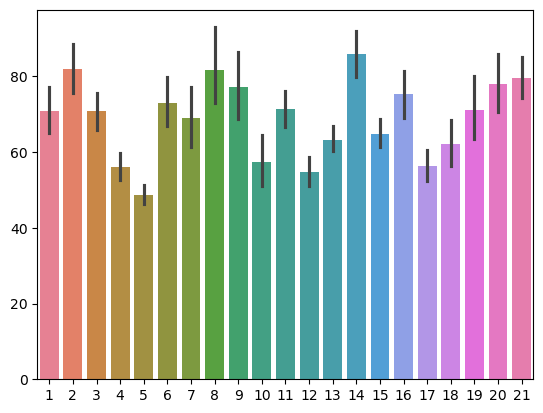

In [29]:
sns.barplot(nuclei_micron, estimator='mean')
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)))
plt.show()

In [30]:
nuclei_micron.median().mean()

63.65758543170066

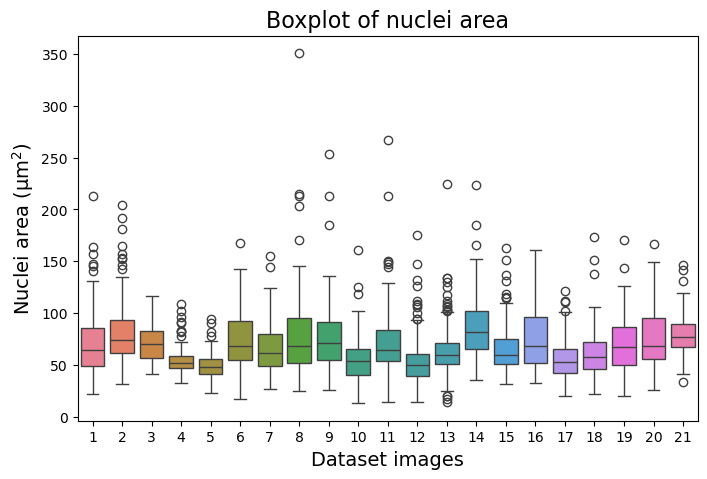

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(nuclei_micron)
plt.ylabel('Nuclei area (μm$^2$)',fontsize=14)
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)))
plt.xlabel('Dataset images',fontsize=14)
plt.title('Boxplot of nuclei area',fontsize=16)
plt.savefig(path_auxiliary + 'nuclei area.png', dpi = 600)
plt.show()

### 3. Mean

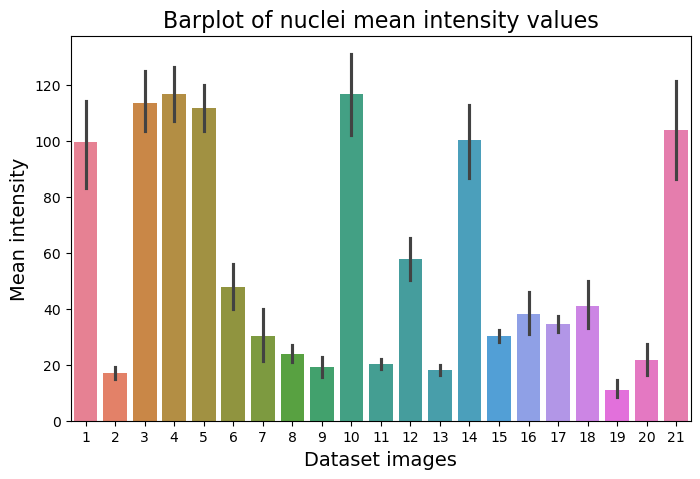

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(nuclei[nuclei_mean], estimator='mean')
plt.ylabel('Mean intensity', fontsize=14)
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)))
plt.xlabel('Dataset images', fontsize=14)
plt.title('Barplot of nuclei mean intensity values', fontsize=16)
plt.savefig(path_auxiliary + 'nuclei intensity.png', dpi = 600)
plt.show()

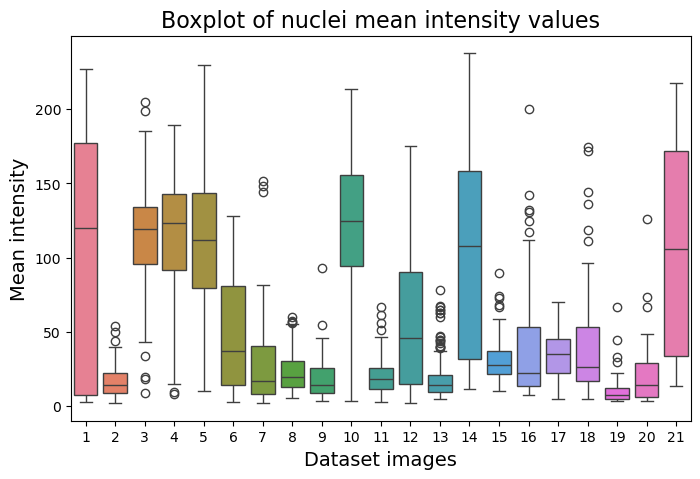

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(nuclei[nuclei_mean])
plt.ylabel('Mean intensity', fontsize=14)
plt.xticks(ticks = np.arange(21), labels=list(np.arange(1,22)))
plt.xlabel('Dataset images', fontsize=14)
plt.title('Boxplot of nuclei mean intensity values', fontsize=16)
plt.show()

## D. Nuclei Statistics 3D

In [11]:
nuclei3d = pd.read_csv(path_auxiliary + 'nuclei measurements 3d.csv', delimiter=';')
info = pd.read_csv(path_auxiliary + 'images info.csv', delimiter=';')
cells = nuclei3d.groupby(by=['group_name_001'], group_keys=True)

In [12]:
cells.apply(lambda x: x)

image_001  area_001  mean_001  min_001  max_001  \
group_name_001                                                        
cell1          0            1    55.971   117.869       12      241   
               1            2    61.635   172.119       19      255   
               2            3    63.634    93.283       16      215   
               3            4    51.307    43.597       17       81   
               4            5     9.995    25.100       19       33   
...                       ...       ...       ...      ...      ...   
cell97         477        478    98.282     4.166        0       11   
cell98         478        479    55.971     4.720        1       10   
               479        480    77.626     5.300        1       12   
cell99         480        481    48.975     3.469        0        8   
               481        482    65.300     5.357        1       13   

                    group_001 group_name_001  
group_name_001                                
cell1          0            1          cell1  
               1            1          cell1  
               2            1          cell1  
               3            1          cell1  
               4            1          cell1  
...                       ...            ...  
cell97         477         97         cell97  
cell98         478         98         cell98  
               479         98         cell98  
cell99         480         99         cell99  
               481         99         cell99  

[538 rows x 7 columns]

In [13]:
list_cells = np.unique(nuclei3d['group_name_001'])
cells['area_001'].mean().mean()


55.13138101003934

In [18]:
cells['area_001'].mean().mean(), nuclei_micron['area_001'].mean()

(55.13138101003934, 70.89334110784098)

/var/folders/p1/6g8qw2ls3v7cq5v7dd31td5m0000gq/T/ipykernel_1319/1694233426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cells['area_001'].mean(), kde = True, hist=True, color=sns.color_palette("flare")[0], bins = 25)


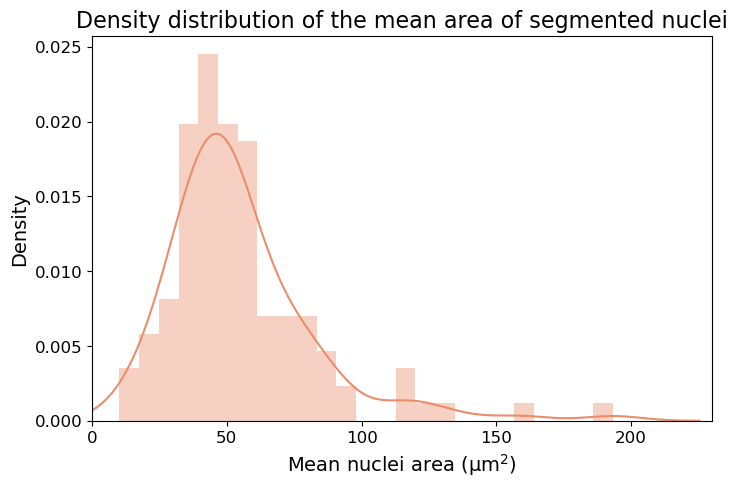

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(cells['area_001'].mean(), kde = True, hist=True, color=sns.color_palette("flare")[0], bins = 25)
# sns.distplot(nuclei['mean_001'], kde = True, hist=True, color=sns.color_palette("flare")[5], bins = 25)
plt.xlim((0, 230))
plt.xlabel("Mean nuclei area (μm$^2$)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Density distribution of the mean area of segmented nuclei", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(path_auxiliary + "density area.png", dpi = 600)
plt.show()

/var/folders/p1/6g8qw2ls3v7cq5v7dd31td5m0000gq/T/ipykernel_1319/518516282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cells['mean_001'].mean(), kde = True, hist=True, color=sns.color_palette("flare")[5], bins = 8)


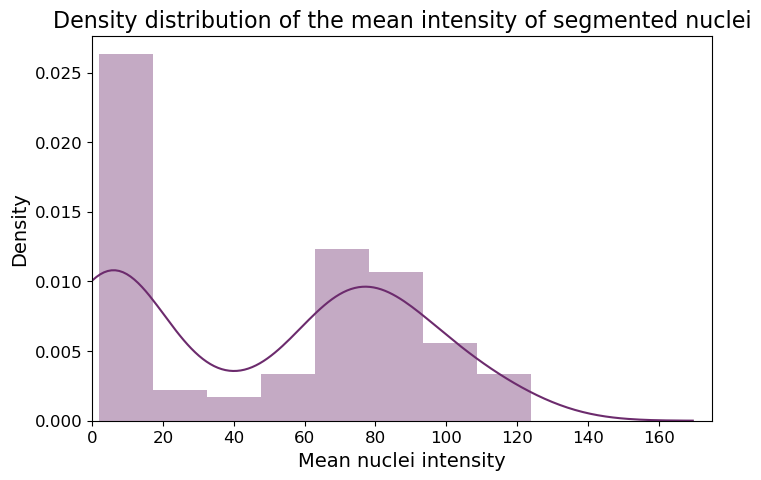

In [21]:
plt.figure(figsize=(8,5))
sns.distplot(cells['mean_001'].mean(), kde = True, hist=True, color=sns.color_palette("flare")[5], bins = 8)
plt.xlim((0, 175))
plt.xlabel("Mean nuclei intensity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Density distribution of the mean intensity of segmented nuclei", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(path_auxiliary + "density intensity.png", dpi = 600)
plt.show()

In [22]:
data = pd.DataFrame(np.array((cells['area_001'].mean(), cells['mean_001'].mean())).T, columns = ['area', 'mean'])
data

,area,mean
0,48.508400,90.393600
1,45.843000,111.846600
2,81.513667,5.995000
3,57.859000,4.905333
4,57.414333,4.854667
...,...,...
112,88.842667,4.061000
113,54.139000,4.364000
114,92.118750,4.674250
115,66.798500,5.010000


/var/folders/p1/6g8qw2ls3v7cq5v7dd31td5m0000gq/T/ipykernel_1319/1176765010.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="area", y="mean", data=data, cmap="flare", shade=False, shade_lowest=False, ax=g.ax_joint)
/var/folders/p1/6g8qw2ls3v7cq5v7dd31td5m0000gq/T/ipykernel_1319/1176765010.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="area", y="mean", data=data, cmap="flare", shade=False, shade_lowest=False, ax=g.ax_joint)
/var/folders/p1/6g8qw2ls3v7cq5v7dd31td5m0000gq/T/ipykernel_1319/1176765010.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for 

<Figure size 500x500 with 0 Axes>

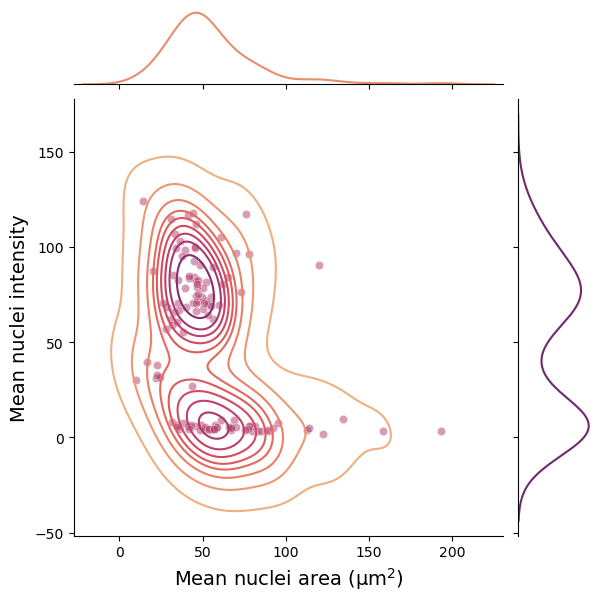

In [23]:
fig = plt.figure(figsize=(5,5))
g = sns.JointGrid(x="area", y="mean", data=data)
sns.kdeplot(x="area", y="mean", data=data, cmap="flare", shade=False, shade_lowest=False, ax=g.ax_joint)
sns.distplot(data['area'], kde=True, hist=False, color=sns.color_palette("flare")[0], ax=g.ax_marg_x)
sns.distplot(data['mean'], kde=True, hist=False, color=sns.color_palette("flare")[5], ax=g.ax_marg_y, vertical=True)
sns.scatterplot(x=data['area'], y=data['mean'], color=sns.color_palette("flare")[3], ax=g.ax_joint, alpha=0.5)
# plt.title("Bivariate distribution between the mean intensity\nand the area of segmented nuclei\n\n\n\n", fontsize = 16)
# plt.ylabel("Mean intensity of nuclei", fontsize = 14)
# plt.xlabel("Mean area of nuclei", fontsize = 14)
g.set_axis_labels(xlabel="Mean nuclei area (μm$^2$)", ylabel="Mean nuclei intensity", fontsize = 14)
plt.savefig(path_auxiliary + "bivariate.png", dpi=600)
plt.show()


In [42]:
nuclei_count = len(list_cells)
nuclei_count

117

In [43]:
stats.pearsonr(cells['area_001'].mean(), cells['mean_001'].mean())

(-0.3813656646615903, 2.212568546378317e-05)

In [61]:
stats.spearmanr(cells['area_001'].mean(), cells['mean_001'].mean())

SpearmanrResult(correlation=-0.41625829849091095, pvalue=3.0440659177114002e-06)

### 4. Fluorescence Signal Correction

In [44]:
mean_slices_dapi = pd.read_csv(path_auxiliary + "mean slices dapi.csv", delimiter=';', index_col='slice')
mean_slices_dapi

,image_001_dapi,image_002_dapi,image_003_dapi,image_004_dapi,image_005_dapi,image_006_dapi,image_007_dapi,image_008_dapi,image_009_dapi,image_010_dapi,...,image_013_dapi,image_014_dapi,image_015_dapi,image_016_dapi,image_017_dapi,image_018_dapi,image_019_dapi,image_020_dapi,image_021_dapi,image_022_dapi
slice,,,,,,,,,,,,,,,,,,,,,
1,0.418,0.209,0.497,0.666,0.661,0.210,0.082,0.114,0.292,0.689,...,0.531,0.567,1.398,0.533,0.888,0.567,0.109,0.284,0.083,1.257
2,0.439,0.205,0.499,0.666,0.681,0.209,0.073,0.109,0.286,0.667,...,0.529,0.572,1.479,0.538,0.910,0.572,0.143,0.284,0.101,1.242
3,0.425,0.206,0.498,0.695,0.684,0.216,0.068,0.104,0.264,0.654,...,0.543,0.569,1.558,0.539,0.958,0.569,0.154,0.284,0.081,1.281
4,0.436,0.192,0.521,0.741,0.693,0.205,0.067,0.102,0.238,0.650,...,0.550,0.569,1.701,0.539,0.954,0.569,0.132,0.284,0.066,1.132
5,0.434,0.168,0.514,0.836,0.726,0.174,0.064,0.100,0.222,0.641,...,0.548,0.565,1.573,0.529,0.930,0.565,0.094,0.284,0.061,1.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289,NaN,NaN


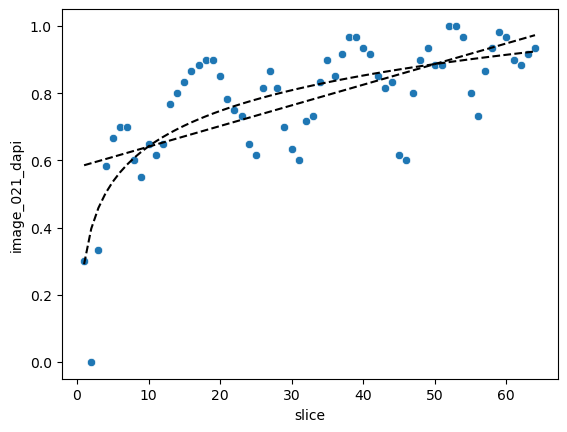

In [45]:
image = 'image_021_dapi'
plot = ((mean_slices_dapi[image].max()-mean_slices_dapi[image])/(mean_slices_dapi[image].max()-mean_slices_dapi[image].min()))[:64]

sns.scatterplot(plot)
m_dapi, b_dapi = np.polyfit(np.arange(1,65), plot, 1)
x = np.arange(1,65)
plt.plot(x, m_dapi*x+b_dapi, '--k')
m_dapi, b_dapi = np.polyfit(np.log(np.arange(1,65)), plot, 1)
x = np.arange(1,65)
plt.plot(x, m_dapi*np.log(x)+b_dapi, '--k')

In [46]:
# mean_slices_dapi_64 = mean_slices_dapi.loc[:, ~mean_slices_dapi.columns.isin(['image_020_dapi', 'image_018_dapi', 'image_014_dapi', 'image_012_dapi', 'image_008_dapi'])][:64]
mean_slices_dapi_64 = mean_slices_dapi.loc[:, ~mean_slices_dapi.columns.isin([])][:64]
mean_slices_dapi_64

,image_001_dapi,image_002_dapi,image_003_dapi,image_004_dapi,image_005_dapi,image_006_dapi,image_007_dapi,image_008_dapi,image_009_dapi,image_010_dapi,...,image_013_dapi,image_014_dapi,image_015_dapi,image_016_dapi,image_017_dapi,image_018_dapi,image_019_dapi,image_020_dapi,image_021_dapi,image_022_dapi
slice,,,,,,,,,,,,,,,,,,,,,
1,0.418,0.209,0.497,0.666,0.661,0.210,0.082,0.114,0.292,0.689,...,0.531,0.567,1.398,0.533,0.888,0.567,0.109,0.284,0.083,1.257
2,0.439,0.205,0.499,0.666,0.681,0.209,0.073,0.109,0.286,0.667,...,0.529,0.572,1.479,0.538,0.910,0.572,0.143,0.284,0.101,1.242
3,0.425,0.206,0.498,0.695,0.684,0.216,0.068,0.104,0.264,0.654,...,0.543,0.569,1.558,0.539,0.958,0.569,0.154,0.284,0.081,1.281
4,0.436,0.192,0.521,0.741,0.693,0.205,0.067,0.102,0.238,0.650,...,0.550,0.569,1.701,0.539,0.954,0.569,0.132,0.284,0.066,1.132
5,0.434,0.168,0.514,0.836,0.726,0.174,0.064,0.100,0.222,0.641,...,0.548,0.565,1.573,0.529,0.930,0.565,0.094,0.284,0.061,1.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.426,0.113,0.572,0.713,0.673,0.128,0.041,NaN,0.158,0.701,...,0.543,NaN,0.803,0.580,0.794,NaN,0.054,0.282,0.043,0.809
61,0.406,0.112,0.562,0.711,0.671,0.118,0.041,NaN,0.159,0.706,...,0.539,NaN,0.802,0.571,0.772,NaN,0.056,0.280,0.047,0.793
62,0.458,0.115,0.563,0.692,0.691,0.120,0.043,NaN,0.159,0.711,...,0.529,NaN,0.816,0.559,0.792,NaN,0.060,0.280,0.048,0.801


In [47]:
(mean_slices_dapi_64/mean_slices_dapi_64.min()).T.var().mean()

0.07993932848855918

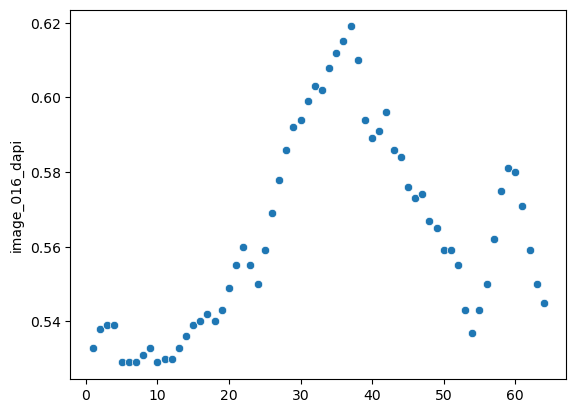

In [48]:
sns.scatterplot(x = np.arange(1,65), y = mean_slices_dapi_64['image_016_dapi'].T)
m,b = np.polyfit(np.log(np.arange(1,65)), mean_slices_dapi_64['image_016_dapi'].T, 1)
x = np.arange(1,65)

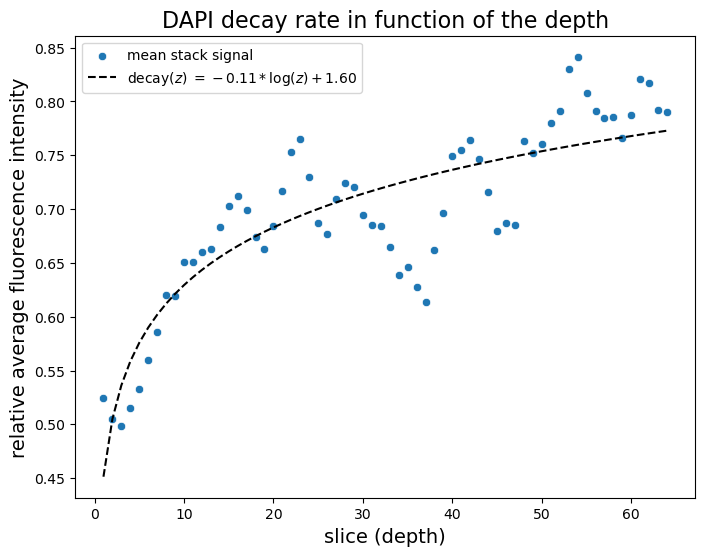

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.arange(1,65), y = ((mean_slices_dapi_64.max()-mean_slices_dapi_64)/(mean_slices_dapi_64.max()-mean_slices_dapi_64.min())).T.mean())
m_dapi, b_dapi = np.polyfit(np.log(np.arange(1,65)), ((mean_slices_dapi_64.max()-mean_slices_dapi_64)/(mean_slices_dapi_64.max()-mean_slices_dapi_64.min())).T.mean(), 1)
x = np.arange(1,65)
plt.plot(x, m_dapi*np.log(x)+b_dapi, '--k')
plt.legend(("mean stack signal", "decay($z$) $= -0.11*$log$(z)+1.60$"))
plt.ylabel("relative average fluorescence intensity", fontsize=14)
plt.xlabel("slice (depth)", fontsize=14)
plt.title("DAPI decay rate in function of the depth", fontsize=16)
# a2,a1,a0 = np.polyfit(np.arange(64), (cut64/cut64.min()).T.mean(), 2)
# x = np.arange(64)
# plt.plot(x, a2*x**2+a1*x+a0, '--k')

# plt.plot(x, m*np.log(x)+b, '--k')
# a0, a1, a2 = np.polyfit(np.arange(64), ((cut64.max()-cut64)/(cut64.max()-cut64.min())).T.mean(), 2)
x = np.arange(1,65)


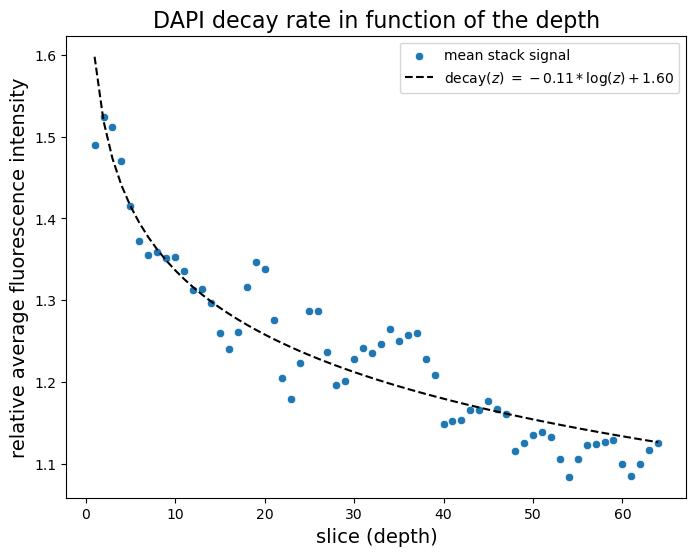

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.arange(1,65), y = (mean_slices_dapi_64/mean_slices_dapi_64.min()).T.mean())
m_dapi, b_dapi = np.polyfit(np.log(np.arange(1,65)), (mean_slices_dapi_64/mean_slices_dapi_64.min()).T.mean(), 1)
x = np.arange(1,65)
plt.plot(x, m_dapi*np.log(x)+b_dapi, '--k')
plt.legend(("mean stack signal", "decay($z$) $= -0.11*$log$(z)+1.60$"))
plt.ylabel("relative average fluorescence intensity", fontsize=14)
plt.xlabel("slice (depth)", fontsize=14)
plt.title("DAPI decay rate in function of the depth", fontsize=16)
# a2,a1,a0 = np.polyfit(np.arange(64), (cut64/cut64.min()).T.mean(), 2)
# x = np.arange(64)
# plt.plot(x, a2*x**2+a1*x+a0, '--k')

# plt.plot(x, m*np.log(x)+b, '--k')
# a0, a1, a2 = np.polyfit(np.arange(64), ((cut64.max()-cut64)/(cut64.max()-cut64.min())).T.mean(), 2)
x = np.arange(1,65)


In [51]:
((mean_slices_dapi_64/mean_slices_dapi_64.min()).T/(m_dapi*np.log(x)+b_dapi)).mean()

slice
1     0.932480
2     1.003303
3     1.026187
4     1.020159
5     0.999721
        ...   
60    0.969923
61    0.959027
62    0.972734
63    0.989698
64    0.999699
Length: 64, dtype: float64

In [52]:
m_dapi,b_dapi

(-0.11342225730668094, 1.5978189283876219)

In [53]:
mean_slices_gfap = pd.read_csv(path_auxiliary + "mean slices gfap.csv", delimiter=';', index_col='slice')
# mean_slices_gfap_64 = mean_slices_gfap.loc[:, ~mean_slices_gfap.columns.isin(['image_020_gfap', 'image_018_gfap', 'image_014_gfap', 'image_012_gfap', 'image_008_gfap'])][:64]
mean_slices_gfap_64 = mean_slices_gfap.loc[:, ~mean_slices_gfap.columns.isin([])][:64]
mean_slices_gfap_64

,image_001_gfap,image_002_gfap,image_003_gfap,image_004_gfap,image_005_gfap,image_006_gfap,image_007_gfap,image_008_gfap,image_009_gfap,image_010_gfap,...,image_013_gfap,image_014_gfap,image_015_gfap,image_016_gfap,image_017_gfap,image_018_gfap,image_019_gfap,image_020_gfap,image_021_gfap,image_022_gfap
slice,,,,,,,,,,,,,,,,,,,,,
1,1.023,1.221,2.161,2.388,2.121,1.452,0.710,1.068,2.112,2.937,...,1.609,1.642,3.516,1.668,2.011,1.642,2.202,0.528,0.432,2.168
2,1.030,0.998,2.161,2.384,2.165,1.358,0.607,1.098,2.192,2.887,...,1.641,1.655,3.740,1.676,2.005,1.655,2.494,0.533,0.402,2.085
3,1.069,0.911,2.145,2.526,2.184,1.127,0.555,1.100,2.205,2.844,...,1.751,1.656,3.905,1.690,2.016,1.656,2.522,0.531,0.383,1.964
4,1.122,1.045,2.174,2.767,2.182,0.946,0.535,1.081,2.426,2.824,...,1.896,1.641,3.613,1.721,1.977,1.641,2.379,0.532,0.461,1.865
5,1.127,1.146,2.194,2.917,2.196,0.929,0.534,1.049,2.241,2.802,...,2.023,1.618,3.045,1.744,1.896,1.618,1.805,0.535,0.472,1.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1.076,0.425,2.079,2.349,2.280,0.589,0.247,NaN,0.543,2.524,...,2.003,NaN,1.351,1.781,1.489,NaN,0.344,0.845,0.249,1.252
61,1.041,0.401,1.989,2.307,2.304,0.532,0.272,NaN,0.486,2.626,...,1.907,NaN,1.305,1.750,1.449,NaN,0.309,0.799,0.246,1.254
62,1.038,0.422,1.938,2.236,2.324,0.511,0.314,NaN,0.470,2.667,...,1.812,NaN,1.288,1.729,1.435,NaN,0.319,0.748,0.229,1.249


In [54]:
(mean_slices_gfap_64/mean_slices_gfap_64.min()).T.var().median()

0.11639514821510986

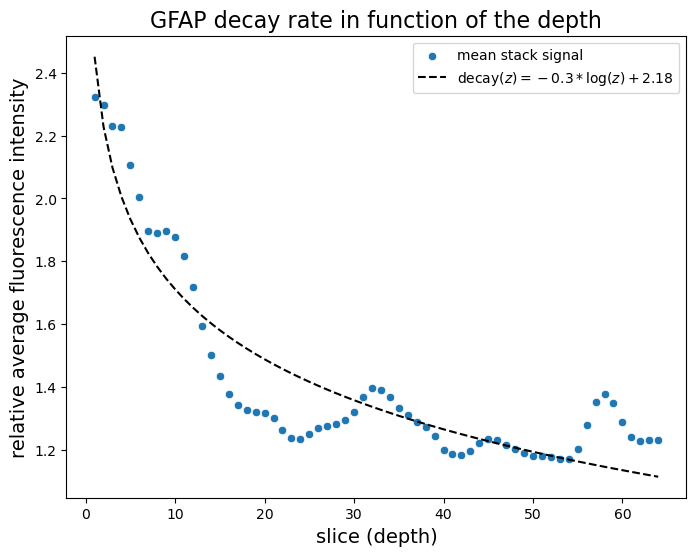

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.arange(1,65), y = (mean_slices_gfap_64/mean_slices_gfap_64.min()).T.mean())
m_gfap,b_gfap = np.polyfit(np.log(np.arange(1,65)), (mean_slices_gfap_64/mean_slices_gfap_64.min()).T.mean(), 1)
x = np.arange(1,65)
plt.plot(x, m_gfap*np.log(x)+b_gfap, '--k')
plt.legend(("mean stack signal", "decay$(z) = -0.3*$log$(z)+2.18$"))
plt.ylabel("relative average fluorescence intensity", fontsize=14)
plt.xlabel("slice (depth)", fontsize=14)
plt.title("GFAP decay rate in function of the depth", fontsize=16)
# a2,a1,a0 = np.polyfit(np.arange(64), (cut64/cut64.min()).T.mean(), 2)
# x = np.arange(64)
# plt.plot(x, a2*x**2+a1*x+a0, '--k')
# sns.scatterplot(x = np.arange(1,65), y = mean_slices_dapi_64.T.mean())
# m,b = np.polyfit(np.log(np.arange(1,65)), mean_slices_dapi_64.T.mean(), 1)
# x = np.arange(1,65)
# plt.plot(x, m*np.log(x)+b, '--k')
# a0, a1, a2 = np.polyfit(np.arange(64), ((cut64.max()-cut64)/(cut64.max()-cut64.min())).T.mean(), 2)
x = np.arange(1,65)


In [56]:
(mean_slices_gfap_64/mean_slices_gfap_64.min()).T.var().median()

0.11639514821510986

In [57]:
m_gfap,b_gfap

(-0.32142839581348004, 2.4512065616944296)

#### After correction

In [58]:
mean_slices_dapi_adj = pd.read_csv(path_auxiliary + "mean slices dapi adj.csv", delimiter=';', index_col='slice')
mean_slices_gfap_adj = pd.read_csv(path_auxiliary + "mean slices gfap adj.csv", delimiter=';', index_col='slice')
mean_slices_dapi_adj

,image_001_dapi,image_002_dapi,image_003_dapi,image_004_dapi,image_005_dapi,image_006_dapi,image_007_dapi,image_008_dapi,image_009_dapi,image_010_dapi,...,image_013_dapi,image_014_dapi,image_015_dapi,image_016_dapi,image_017_dapi,image_018_dapi,image_019_dapi,image_020_dapi,image_021_dapi,image_022_dapi
slice,,,,,,,,,,,,,,,,,,,,,
1,0.654,1.170,0.596,0.543,0.538,1.083,1.133,1.213,1.096,0.567,...,0.637,0.579,0.897,0.539,0.553,0.579,0.975,0.570,0.996,0.810
2,0.678,1.204,0.599,0.545,0.559,1.184,1.096,1.235,1.133,0.667,...,0.636,0.686,1.183,0.546,0.728,0.686,1.026,0.626,1.014,0.810
3,0.756,1.213,0.602,0.695,0.684,1.200,1.067,1.249,1.083,0.656,...,0.660,0.684,1.257,0.647,0.770,0.684,1.053,0.627,1.026,1.029
4,0.761,1.189,0.632,0.744,0.694,1.189,1.088,1.236,0.997,0.659,...,0.671,0.686,1.389,0.648,0.770,0.686,1.038,0.681,1.044,0.911
5,0.757,1.081,0.624,0.844,0.729,1.151,1.055,1.215,0.950,0.651,...,0.767,0.688,1.295,0.635,0.751,0.688,0.986,0.683,0.983,1.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928,NaN,NaN


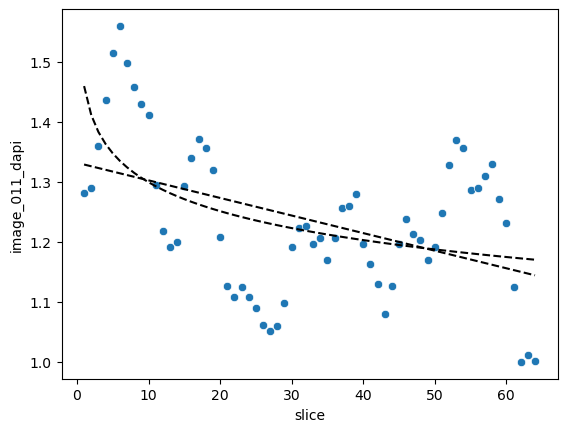

In [59]:
image = 'image_011_dapi'
plot = (mean_slices_dapi_adj[image]/mean_slices_dapi_adj[image].min())[:64]

sns.scatterplot(plot)
m_dapi, b_dapi = np.polyfit(np.arange(1,65), plot, 1)
x = np.arange(1,65)
plt.plot(x, m_dapi*x+b_dapi, '--k')
m_dapi, b_dapi = np.polyfit(np.log(np.arange(1,65)), plot, 1)
x = np.arange(1,65)
plt.plot(x, m_dapi*np.log(x)+b_dapi, '--k')

TypeError: expected x and y to have same length

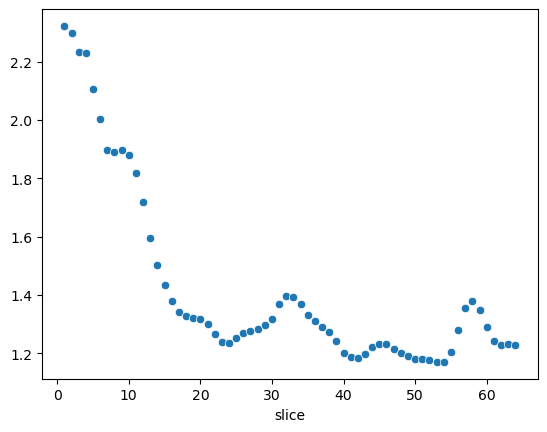

In [60]:
sns.scatterplot((mean_slices_gfap_adj/mean_slices_gfap_adj.min()).T.mean()[:64])
m_gfap_adj,b_gfap_adj = np.polyfit(np.log(np.arange(1,65)), (mean_slices_gfap_adj/mean_slices_gfap_adj.min()).T.mean(), 1)
plt.plot(x, m_gfap_adj*np.log(x)+b_gfap_adj, '--k')

In [ ]:
mean_slices_dapi_64.T.mean().mean(), mean_slices_dapi_64.T.var().mean()

(0.4477389441287879, 0.10756641848876664)

In [ ]:
mean_slices_gfap_64.T.mean().mean(), mean_slices_gfap_64.T.var().mean()

(1.3329569286616163, 0.600540522518529)

In [ ]:
mean_slices_dapi_adj.T.mean().mean(), mean_slices_dapi_adj.T.var().mean()

(0.9180260606060607, 0.02157537514514478)

In [ ]:
mean_slices_gfap_adj.T.mean().mean(), mean_slices_gfap_adj.T.var().mean()

(1.0973882352941173, 0.17149420008116883)